# Titanic生存预测

任务：使用逻辑回归生存预测。

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 数据预处理

### 数据读入

In [14]:
data=pd.read_csv("../data/archive/train_and_test2.csv")

In [16]:
data.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


### 数据预处理

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

一共1309名旅客信息。数据的列信息：1.乘客id，年龄，船票费用，性别，Pclass（乘客等级）。2.2urvived:获救情况 3.sibsp（堂兄弟妹个数） Parch父母与小孩的个数） Embarked（登船港口） 4.zero数据列的目的是独热编码。 

In [19]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [27]:
data.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [29]:
data[data.isna().any(axis=1)]

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
61,62,38.0,80.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,NaN,0,0,1
829,830,62.0,80.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,NaN,0,0,1


Embarked（登船港口）存在数据缺失

In [31]:
data['Embarked'].value_counts()

Embarked
2.0    914
0.0    270
1.0    123
Name: count, dtype: int64

In [39]:
data['Embarked']=data['Embarked'].fillna(0)
data['Embarked'].value_counts()

Embarked
2.0    914
0.0    272
1.0    123
Name: count, dtype: int64

In [42]:
data.duplicated().any()

np.False_

### 数据洞察

In [66]:
plt.rcParams['font.sans-serif'] = ['SimHei']

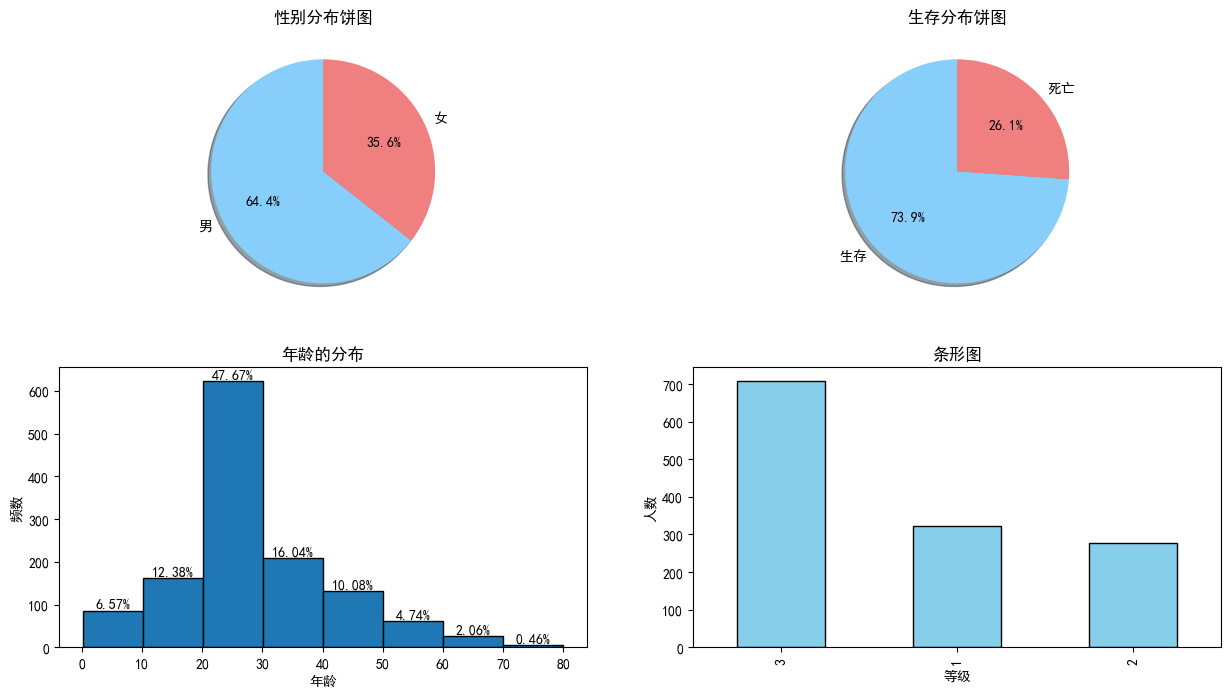

In [199]:
# 绘制子图
fig, ax =plt.subplots(2,2, figsize=(15, 8))

labels=['男','女']
sizes=data['Sex'].value_counts()
colors = [ 'lightskyblue','lightcoral']
ax[0,0].pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # 显示百分比
    shadow=True,  # 添加阴影
    startangle=90  # 旋转角度
)
# 设置标题
ax[0,0].set_title('性别分布饼图')

labels1=['生存','死亡']
sizes1=data['2urvived'].value_counts()
colors1 = [ 'lightskyblue','lightcoral']
ax[0,1].pie(
    sizes1,
    labels=labels1,
    colors=colors1,
    autopct='%1.1f%%',  # 显示百分比
    shadow=True,  # 添加阴影
    startangle=90  # 旋转角度
)
# 设置标题
ax[0,1].set_title('生存分布饼图')

n, bins, patches = ax[1,0].hist(data['Age'],bins=8,edgecolor='black')
total=len(data['Age'])
for i in range(len(n)):
    ax[1,0].text(
        bins[i] + (bins[i+1] - bins[i]) / 2,  # x 位置：柱子中心
        n[i] + 0.1,                            # y 位置：柱子高度上方
        f'{n[i]/total:.2%}',                         # 显示的文本（频率）
        ha='center',                            # 水平对齐方式
        va='bottom'                             # 垂直对齐方式
    )
ax[1,0].set_title('年龄的分布')
ax[1,0].set_xlabel('年龄')
ax[1,0].set_ylabel('频数')

tempt=data['Pclass'].value_counts()
tempt.plot.bar(ax=ax[1,1], color='skyblue', edgecolor='black')
ax[1,1].set_title('条形图')
ax[1,1].set_xlabel('等级')
ax[1,1].set_ylabel('人数')

# 显示图形
plt.show()

可以看出年龄分布在[20,30)岁之间的乘客最多，占47.67%